In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import prophet as fbp
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Use fivethirtyeight plot style
plt.style.use('fivethirtyeight')

/Users/apple/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [14]:


df = pd.read_csv('TATAMOTORS.NS.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-07-31,268.950012,270.450012,262.200012,264.100006,263.279449,10026055
1,2018-08-01,250.000000,268.000000,250.000000,265.049988,264.226471,53282545
2,2018-08-02,263.450012,266.450012,258.700012,260.850006,260.039551,17421472
3,2018-08-03,262.149994,263.850006,257.600006,258.450012,257.647003,9041836
4,2018-08-06,259.950012,261.799988,252.500000,254.050003,253.260666,11371744


In [15]:

# add two columnsin dataframe having values as Date and Adj Close
df[['ds', 'y']] = df[['Date', 'Adj Close']]
# Subset two columns from data frame
df = df[['ds', 'y']]
 
df.head()

,ds,y
0,2018-07-31,263.279449
1,2018-08-01,264.226471
2,2018-08-02,260.039551
3,2018-08-03,257.647003
4,2018-08-06,253.260666


In [16]:

# split data frame  into two parts train and test
split_date = "2022-07-31"
df_train = df.loc[df.ds <= split_date].copy()
df_test = df.loc[df.ds > split_date].copy()

In [17]:

# Instantiate prophet
model = fbp.Prophet()
# fit the training data
model.fit(df_train)

00:45:45 - cmdstanpy - INFO - Chain [1] start processing
00:45:46 - cmdstanpy - INFO - Chain [1] done processing


In [22]:

forecast = model.predict(df_test)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
245,2023-07-24,-0.844570,-7.710242,7.669652,-7.987726,7.176759,0.383706,0.383706,0.383706,1.020885,1.020885,1.020885,-0.637179,-0.637179,-0.637179,0.0,0.0,0.0,-0.460865
246,2023-07-25,-0.861637,-7.753754,7.599321,-8.085283,7.192741,0.330999,0.330999,0.330999,1.031924,1.031924,1.031924,-0.700925,-0.700925,-0.700925,0.0,0.0,0.0,-0.530638
247,2023-07-26,-0.878704,-7.815286,7.374010,-8.152557,7.207909,0.213786,0.213786,0.213786,0.979506,0.979506,0.979506,-0.765720,-0.765720,-0.765720,0.0,0.0,0.0,-0.664918
248,2023-07-27,-0.895771,-7.953519,7.122462,-8.215491,7.213596,0.180758,0.180758,0.180758,1.011578,1.011578,1.011578,-0.830820,-0.830820,-0.830820,0.0,0.0,0.0,-0.715013
249,2023-07-28,-0.912838,-8.231135,7.598641,-8.275340,7.217845,0.141934,0.141934,0.141934,1.037396,1.037396,1.037396,-0.895461,-0.895461,-0.895461,0.0,0.0,0.0,-0.770904


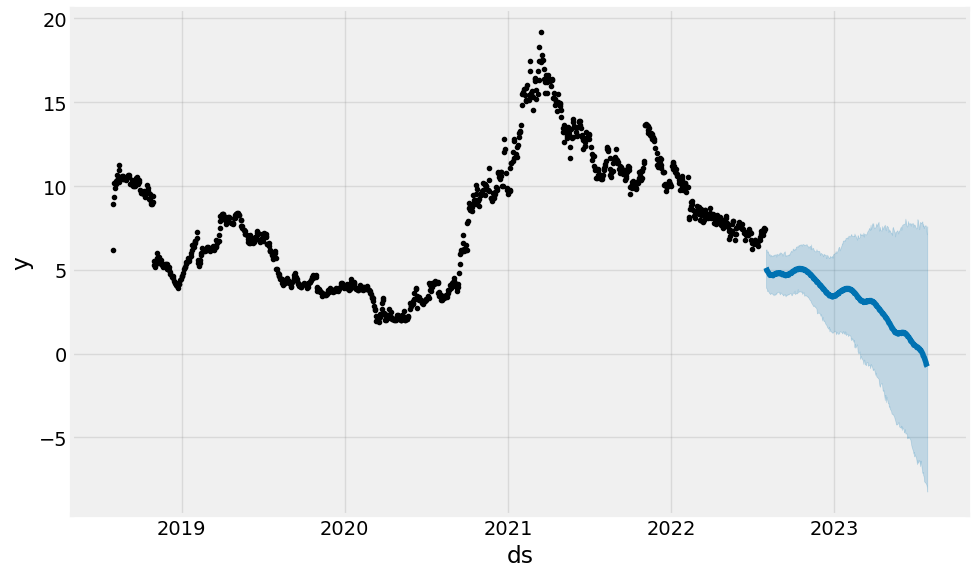

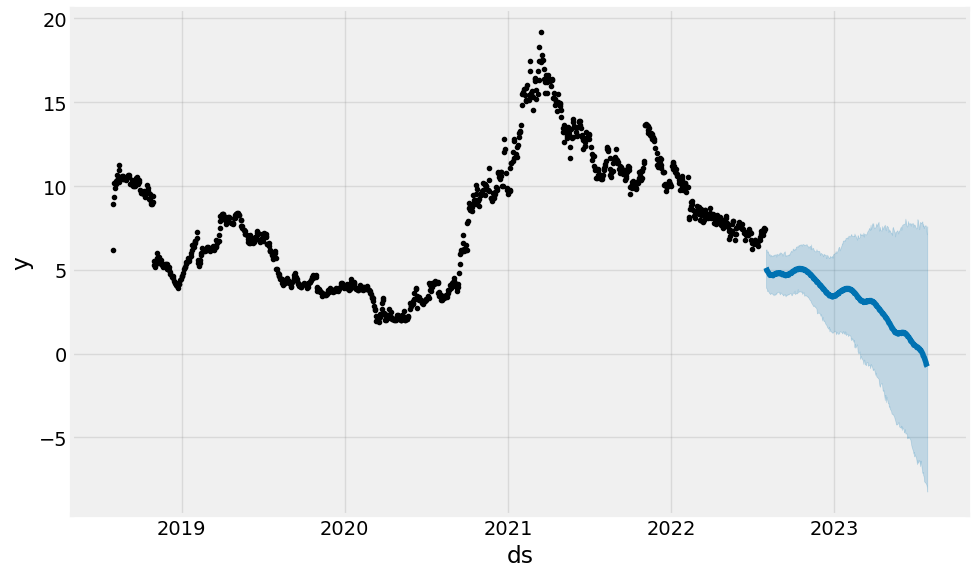

In [23]:
model.plot(forecast)

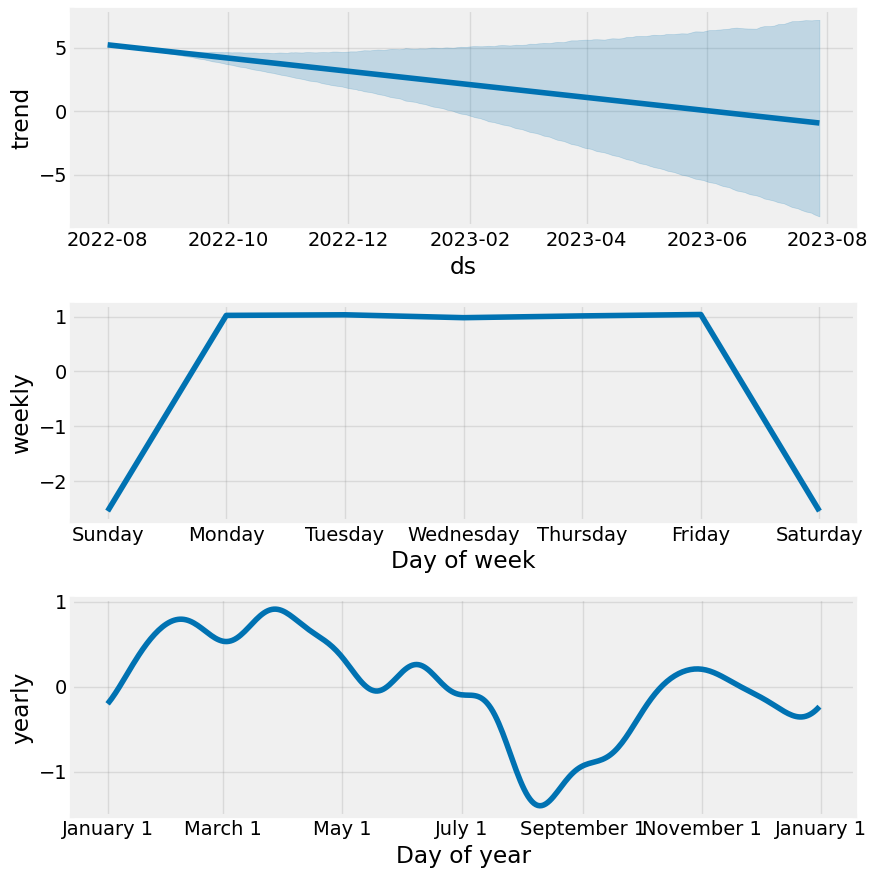

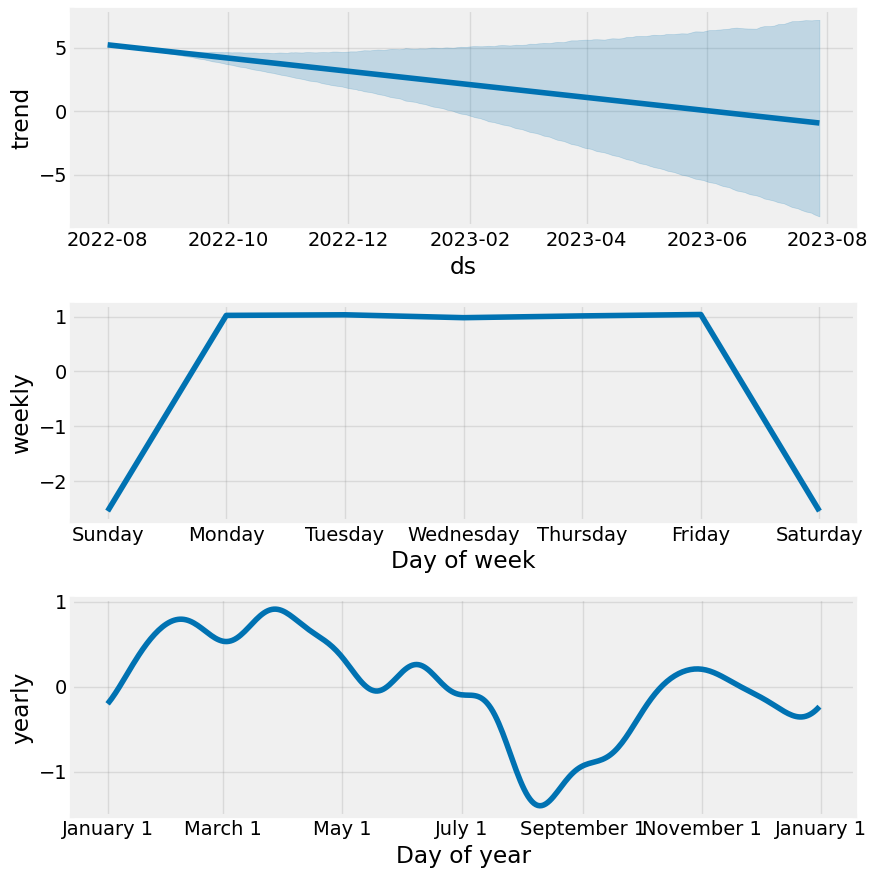

In [24]:
model.plot_components(forecast)